**Hierarchical Clustering**

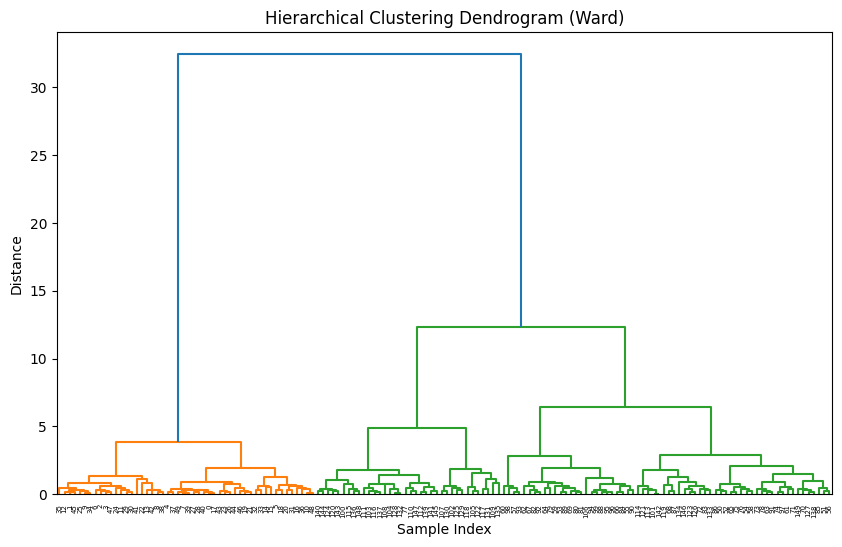

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Select the four features (equivalent to Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)
iris4 = iris_df.iloc[:, [0, 1, 2, 3]]

# Calculate distance matrix using squared Euclidean distance
dist_matrix = pdist(iris4, metric='euclidean')

# Perform hierarchical clustering using Ward's method
hclust = linkage(dist_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(hclust, labels=iris_df.index)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

K-Means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Select the four features (Sepal Length, Sepal Width, Petal Length, Petal Width)
iris4 = iris_df.iloc[:, [0, 1, 2, 3]]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=123)
iriskmeans = kmeans.fit(iris4)

# Get cluster assignments
cluster_labels = iriskmeans.labels_

# Print k-means results
print("K-means clustering results:")
print(f"Cluster centers:\n{iriskmeans.cluster_centers_}")
print(f"Cluster assignments:\n{cluster_labels}")

# Create classification table (cross-tabulation of Species and clusters)
classtable = pd.crosstab(iris_df['Species'], cluster_labels,
                        rownames=['Species'], colnames=['Cluster'])
print("\nClassification table:")
print(classtable)

K-means clustering results:
Cluster centers:
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Cluster assignments:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]

Classification table:
Cluster      0   1   2
Species               
setosa       0  50   0
versicolor   2   0  48
virginica   36   0  14
